**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Title* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [144]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
!pip install imblearn

You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [244]:
# Load the data and cleanup
#Loading the Feature matrix and Label vector
df_1=pd.read_csv('train_data.csv', header=None)
df_2=pd.read_csv('train_labels.csv',header=None)
df_3=pd.read_csv('test_data.csv',header=None)
# convert the data frame to numpy matrix    
X = df_1.as_matrix() 
N,d = df_1.shape #N=example d=features
Y=df_2.as_matrix() 
X_test=df_3.as_matrix()
N_test, d_test=df_3.shape 





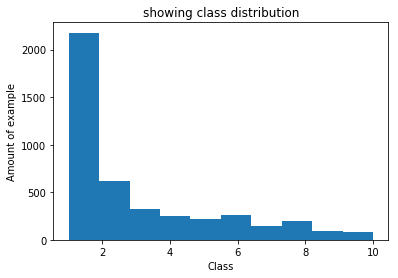

2178.0


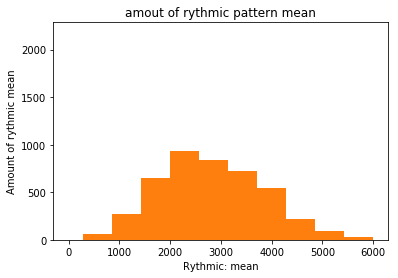

In [231]:
#Analysis of the input data
#histogram showing class distribution
plt.hist(Y,bins=10,range=[1,10],align='mid')
plt.xlabel('Class')
plt.ylabel('Amount of example')
plt.title('showing class distribution')
plt.show()
bounts, bins, bars = plt.hist(Y)
print(bounts[0])

#histogram showing amout of rythmic pattern mean
X_1=np.empty((N,1))
for i in range(N):
    X_1[i]=np.mean(X[i,:24])
plt.hist(X_1)
plt.xlabel('Rythmic: mean')
plt.ylabel('Amount of rythmic mean')
plt.title('amout of rythmic pattern mean')
plt.show()

In [4]:
##loosing the first example!
X_classes=[]
for i in range((10)):
    X_classes_for=np.empty((int(bounts[i]),d))
    lauf=0
    for k in range((N)):
        if Y[k]==(i+1):
            X_classes_for[lauf,:]=(X[k,:])
            lauf+=1
    X_classes.append(X_classes_for)
print((X_classes[0]))

[[  2.30940000e+03   4.78040000e+03   4.05570000e+03 ...,   5.25230000e-02
    5.23570000e-02   5.52970000e-02]
 [  2.33190000e+03   4.60700000e+03   4.73230000e+03 ...,   6.11380000e-02
    8.55090000e-02   4.94220000e-02]
 [  3.35090000e+03   6.27440000e+03   5.03700000e+03 ...,   8.08850000e-02
    1.48910000e-01   4.20270000e-02]
 ..., 
 [  1.29360000e+03   2.36180000e+03   3.42540000e+03 ...,   4.18680000e-02
    1.01890000e-01   9.28110000e-02]
 [  2.23830000e+03   3.66810000e+03   4.44530000e+03 ...,   7.57220000e-02
    7.69900000e-02   5.98900000e-02]
 [  2.58140000e+03   4.73040000e+03   5.02210000e+03 ...,   5.82890000e-02
    5.21430000e-02   4.15240000e-02]]


In [5]:
##creating a list: each row of the list constist of a specific class. One row of the list has a shape of 1,15
X_classes_first=[]#10 arrays in the end 
for i in range((10)):
    X_for=X_classes[i]
    X_for_for=[]
    for j in range(7):
        hilf=np.mean(X_for[:,24*j:24*(j+1)])
        X_for_for.append(hilf)
    for j in range(4):
        hilf=np.mean(X_for[:,168+12*j:168+12*(j+1)])
        X_for_for.append(hilf)
    for j in range(4):
        hilf=np.mean(X_for[:,216+12*j:216+12*(j+1)])
        X_for_for.append(hilf)
    X_classes_first.append(X_for_for)
a=X_classes_first[1]
print(X_classes_first[1])       

[2400.0683814050703, 1758.6356277642935, 1208.8334930555557, 6093.0982605177996, 2187.9372350323624, 525.57142003775618, 6964.6902642259965, 0.38068964023732471, 0.076579721601941764, 0.012826995685005393, 0.99482915318230858, 333333.33317384252, 1.1507292563781015, -0.099717728290183383, 0.11820057173678532]


In [6]:
## Normalizing values:
avg_features = [np.mean([genre[feature_num] for genre in X_classes_first]) for feature_num in range(len(X_classes_first[0]))]
X_classes_first_normalized = [np.divide(X_classes_first[genre_num],avg_features) for genre_num in  range(len(X_classes_first))]

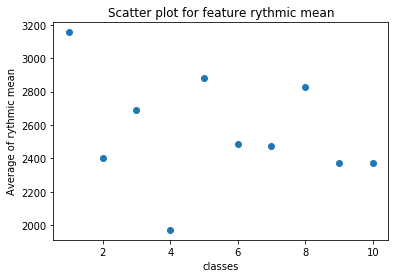

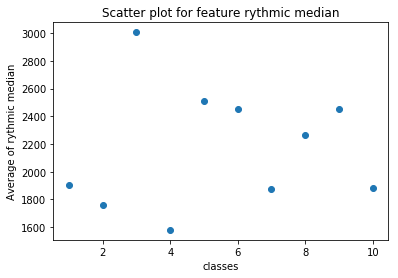

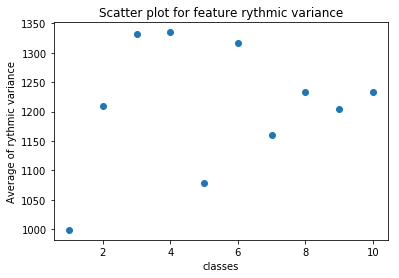

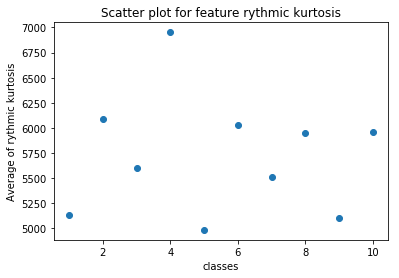

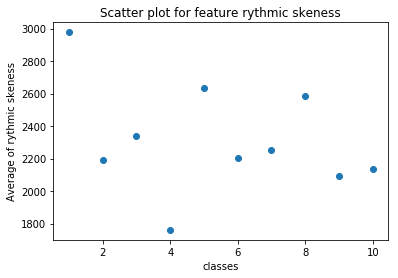

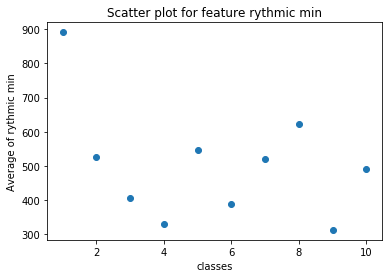

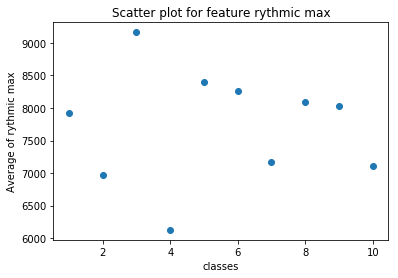

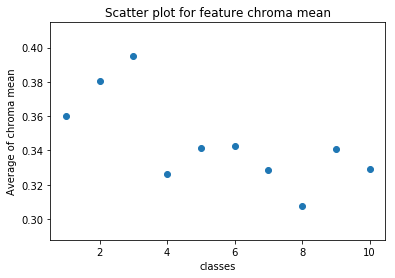

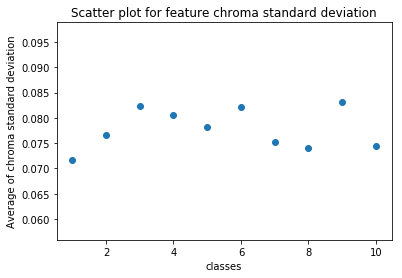

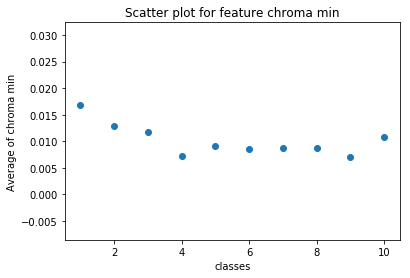

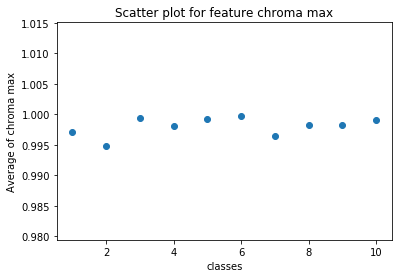

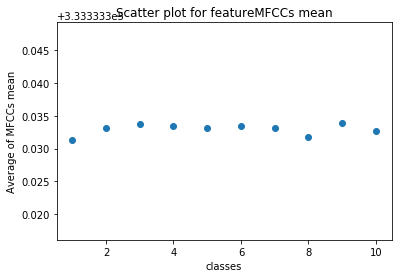

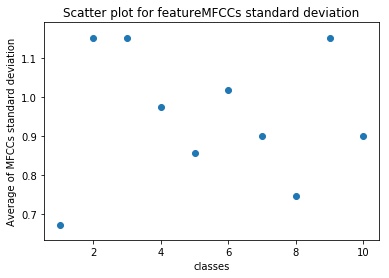

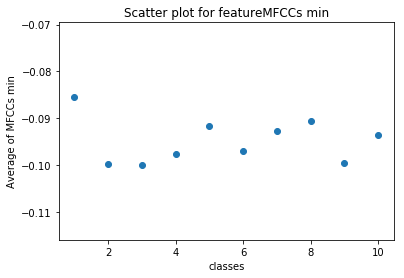

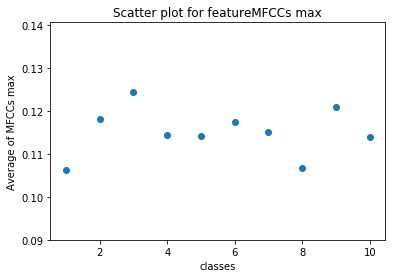

In [28]:
main_comp=['rythmic','chroma','MFCCs']
statistics=['mean', 'median','variance','kurtosis','skeness','min', 'max','mean','standard deviation','min', 'max']
lauf=0
lauf1=7
for k in range((15)):
    classes=[1,2,3,4,5,6,7,8,9,10]
    y=np.empty((1,10))
    for i in range(10):
        X_for=X_classes_first[i]
        y[0,i]=X_for[k]
    plt.scatter(classes,y)
    if k<7:
        plt.title('Scatter plot for feature '+main_comp[0]+' '+statistics[lauf])
        plt.ylabel('Average of '+main_comp[0]+' '+statistics[lauf])
        lauf+=1
    elif 11>k>6:
        plt.title('Scatter plot for feature '+main_comp[1]+' '+statistics[lauf])
        plt.ylabel('Average of '+main_comp[1]+' '+statistics[lauf])
        lauf+=1
    else:
        plt.title('Scatter plot for feature'+main_comp[2]+' '+statistics[lauf1])
        plt.ylabel('Average of '+main_comp[2]+' '+statistics[lauf1])
        lauf1+=1
    plt.xlabel('classes')
    plt.show()

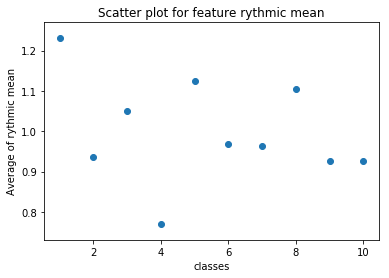

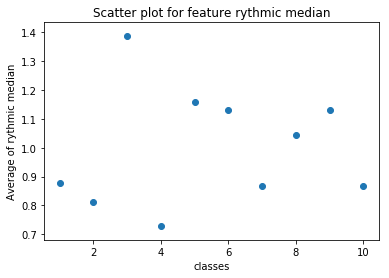

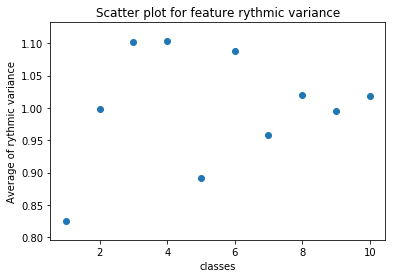

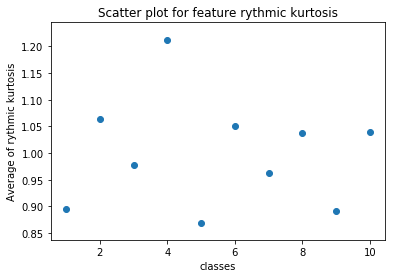

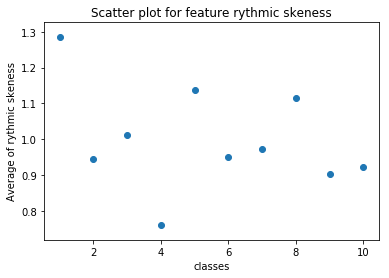

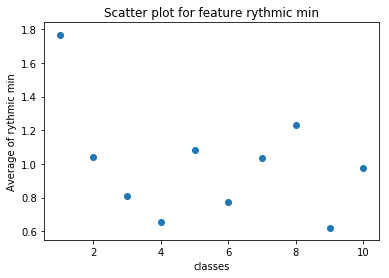

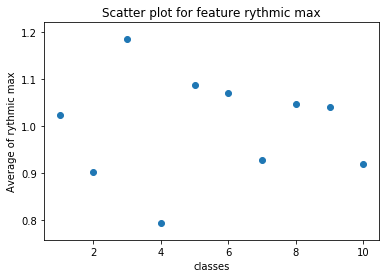

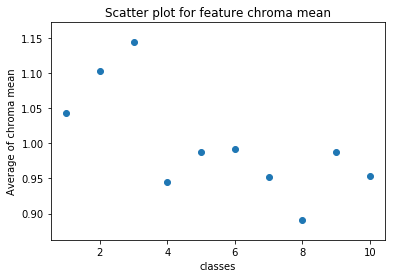

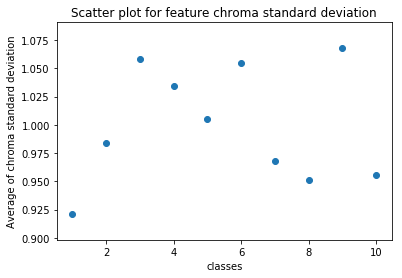

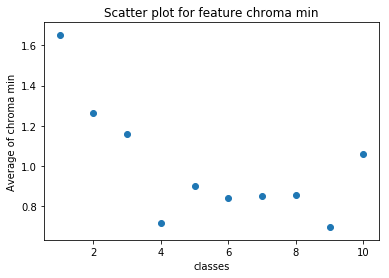

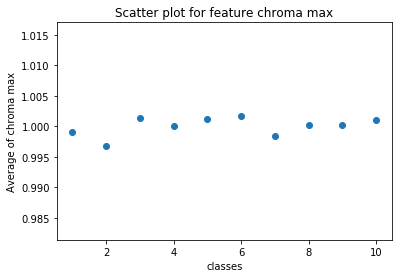

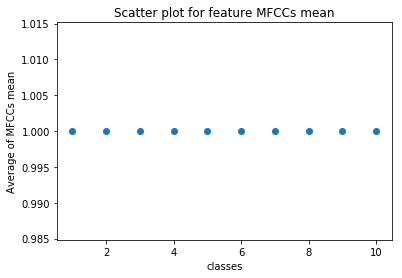

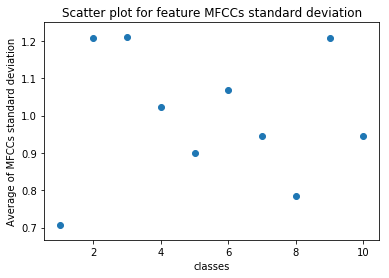

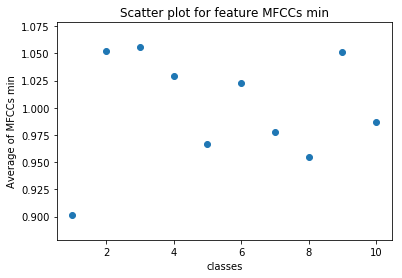

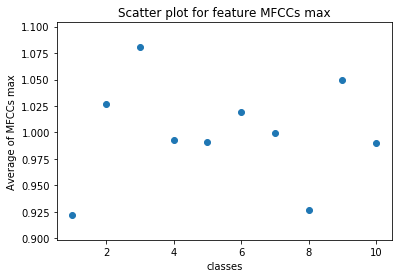

In [27]:
main_comp=['rythmic','chroma','MFCCs']
statistics=['mean', 'median','variance','kurtosis','skeness','min', 'max','mean','standard deviation','min', 'max']
lauf=0
lauf1=7
for k in range((15)):
    classes=[1,2,3,4,5,6,7,8,9,10]
    y=np.empty((1,10))
    for i in range(10):
        X_for=X_classes_first_normalized[i]
        y[0,i]=X_for[k]
    plt.scatter(classes,y)
    if k<7:
        plt.title('Scatter plot for feature '+main_comp[0]+' '+statistics[lauf])
        plt.ylabel('Average of '+main_comp[0]+' '+statistics[lauf])
        lauf+=1
    elif 11>k>6:
        plt.title('Scatter plot for feature '+main_comp[1]+' '+statistics[lauf])
        plt.ylabel('Average of '+main_comp[1]+' '+statistics[lauf])
        lauf+=1
    else:
        plt.title('Scatter plot for feature '+main_comp[2]+' '+statistics[lauf1])
        plt.ylabel('Average of '+main_comp[2]+' '+statistics[lauf1])
        lauf1+=1
    plt.xlabel('classes')
    plt.show()

## 3. Methods and Experiments

The third chapter explains the whole approach and points outs which methods have been used as well as which (un-)successful experiments have been tried in order to achieve the best possible performance. 
The approach consists of three main steps: 
1.	Adapting Feature Matrix
2.	Determining Hypothesis Space
3.	Model Selection (using different performance measurements)

The given feature matrix will be adapted in the way that the best performing hypothesis can be selected out of the hypothesis space for different performance measurements (accuracy and LogLoss).

The three main steps will be described in the following subchapter 3.1, 3.2 and 3.3. 
The whole approach including the methods and experiements will be graphical illustrated in chapter 3.4. 



## 3.1 Adapting Feature Matrix

The outcome of the data analysis in chapter 2 can be used to adapt the Feature Matrix in order optimize the performance of the hypothesis functions. The three main outcomes are the detected outliners in chapter 2.1, the uneven class distribution in chapter 2.2 and the high feature dimensionality in chapter 2.3. How the tree main outcome challenges affect the Feature Matrix and how they can be solved, will be presented in the subchapter 3.1.1 Deleting Outliners, 3.1.2 Balancing The Data Set and 3.1.3 Dimensionality Reduction.  

### 3.1.1 Deleting Outliners

According to https://www.researchgate.net/publication/228965221_On_Detection_Of_Outliers_And_Their_Effect_In_Supervised_Classification, outliners can be removed to improve the accuracy of a hypothesis function. The first four tracks of feature ‚MFCC mean‘ of all data points are detected as outliners and for this very reason, they will be removed from the Feature Matrix. Important to mention is that not the whole tracks of the feature ‘MFCC mean’ should be removed because the other tracks are still useful. Deleting the other tracks would decrease the accuracy of the hypothesis function. (mention it???). 

### 3.1.2 Balancing the Data Set

According to https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/, imbalanced data sets refers "to a problem with classification problems where the classes are not represented equally". One solution can be the resampling of the data set which can be done by oversampling or undersampling the data set. Because the data set consists of less than ten thousand data points, oversampling instead of undersampling is recommended. https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/. 
According to  https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation and https://beckernick.github.io/oversampling-modeling/ , the two following aspects need to be considered in order to resample the data set correctly: 
1.	First cross validating, then resample the minority classes
2.	Creating data points that are interpolation of the minority classes’ data points 

Dividing the data set into a training data set and validation data set before resampling the data set is important to avoid wrong (means too high) validation scores. Otherwise, same data would be used for training and validation which causes a wrong validation score. ( According also to  https://beckernick.github.io/oversampling-modeling/ ). 

The second aspects can be done by using the function SMOTE (Synthetic Minority Over-sampling Technique). It creates data points that are interpolations of the minority classes data points as well as undersamples the minority class   instead of simple duplicate data points of the minority classes. If data points are just duplicated, classifier get very convinced about specific data points instead of generalizing from it. 



### 3.1.3 Dimension Reduction

According to the course book in section 9 Feature Learning, it us beneficial from a computational and statistical perspective to use only a small number of features (e.g. avoiding overfitting). For this very reason, a suitable method of dimensionality reduction has to selected. 
Two known approaches are the Principal Component Analysis (PCA) and the Linear Discriminant Analysis (LDA). While PCA only considers the structure of the data set, LDA utilizes also the class labels (http://rakaposhi.eas.asu.edu/ai/AI-lunch-ye.pdf). To sum it up, LDA is an supervised, whereby PCA an unsupervised dimensionality reduction is. According to http://rakaposhi.eas.asu.edu/ai/AI-lunch-ye.pdf , it is important to differentiate between supervised and unsupervised dimensionality reduction. Usually, supervised dimensionality reduction fits better for supervised machine learning problems than unsupervised reduction. Classification is a supervised machine learning problem and for that reason, the supervised dimensionality reduction Linear Discriminant Analysis will be chosen instead of PCA.

Moreover, through the features consist of three main components (Rhythmic, Chrome, MFCCs), which are very different to each other, the dimensionality reduction will be tried out for each of the components separately. 


## 3.2 Determing Hypothesis Space

The hypothesis space is about finding suitable hypothesis which map the feature vector to a predicted label in a good manner. Hypothesis can be both a classifier and a predictor. In this project, a hypothesis needs to be a classifier in order to classify the feature vector to a specific class. By defining suitable classifier, which is a design choice, a balance between two contradicting goals needs to be find. On the one side, the classifier has to be sufficiently large to represent the true underlying relation between feature and label. On the other side, the classifier has to be sufficient small in order to avoid overfitting (course book). Overfitting means that classifier is performing well at training data but not well on test data. According to http://scikit-learn.org/stable/supervised_learning.html#supervised-learning, the following standard classifier are selected:
- Logistic Regression
- SGD Classifier (Stochastic Gradient Descent)
- MLP Classifier (Multi-Layer-Perceptron, Neural Network)
- Random Forest
- Decision Tree


## 3.3 Model Selection (using different performance measurements) 

According to the course book, a model (which means a hypothesis) has to be selected out of the hypothesis space. As mentioned before, it is important to split the data set into a training and validation set in order to prove how well hypothesis perform on new, unknown data points. For the cross validation, the kFold validation will be used which is integrated in the function cross_val_score. But a good performance on validation data does not automatically stand for a good performance on the test data. For ecample: If the validation score is higher than training score, overfitting might be occurred. Therefore,  the models with best validation performance will be tested how good they perform on test data (via uploading on Kaggle).

Moreover, how do we measure good performance? Therefore, two different performance measurements (also called evaluation metrics) are selected:
- Accuracy
- LogLoss

According to https://www.math.ucdavis.edu/~saito/data/roc/ferri-class-perf-metrics.pdf , accuracy measure is defined as the degree of right predictions of model and is used to minimize the number of error. It is the simplest measure to evaluate a classfier.  
The log Loss is measure of how good probability estimationes are and is used to assess the reliability of the classifier. 
To sum it up, Accuracy measure stands for an qualitatitive understanding of error and LogLoss measure forn a probalistic understanding of error. 

Depending on property of the data set, choice made by one performance measurement (evaluation metric) can be different to choices made based on other performance measurements. 



## 3.4 Summary of the chosen approach

The above described methods and experiements are illustrated in the follwing graphic. In the next chapter 4. Result, the methods and experiements will be tried out and will be discussed in chapter 5.Discussion.

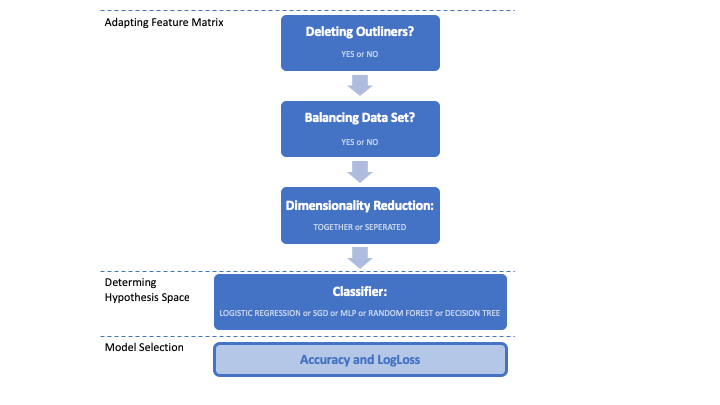

In [259]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold

y=Y
def get_Featurematrix_clean(X, clean='wrong'):
    #return a cleaned featurematrix, cleans cosist of cleaning bad data(wrong) or bad data &redundant data
    if clean=='wrong':
        X_clean=np.delete(X, np.arange(216 , 220 , 1),axis=1) #feature MFCC mean 
        return X_clean
    elif clean=='wrong+redundant':
        X_1=np.delete(X, np.arange(240 , 268 , 1),axis=1) #feature MFCC min max 
        X_2=np.delete(X_1, np.arange(216 , 228 , 1),axis=1) #feature MFCC mean
        X_clean=np.delete(X_2, np.arange(180 , 192 , 1),axis=1) #chroma max 
        return X_clean

def get_oversampling(X,y,times_over=6, copy_row=2178):
    #times_over defines how many times you want to add examples for class2 to class10
    #copy_line defines from which row you what to copy the examples (examples for class1: row 0-2177)
    N,d=X.shape
    X_over=np.empty((N+times_over*(N-copy_row),d))
    y_over=np.empty((N+times_over*(N-copy_row),1))
    X_over[:N,:]=X
    y_over[:N,:]=y
    for i in range(times_over):
        X_over[N+i*(N-copy_row):N+(i+1)*(N-copy_row),:]=X[copy_row:N,:]
        y_over[N+i*(N-copy_row):N+(i+1)*(N-copy_row)]=y[copy_row:N]
    return X_over, y_over

def get_undersampling(X,y, cutting_row=1500):
    #cutting row defines how many of the first 2100 examples of the first example should be cutted
    N,d=X.shape
    X_under=X[cutting_row:N,:]
    y_under=y[cutting_row:N]
    return X_under, y_under

def reorder_func(X,y,over_under):
    #True is way better!!
    X_training, X_valid, y_training, y_valid = train_test_split(X,y, train_size=0.999 , random_state=42)
    if over_under=='smote':
        sm = SMOTE(random_state=42)
        X_training, y_training = sm.fit_sample(X_training, y_training)  #was y_training.ravel()
        return X_training,X_valid, y_training, y_valid
    else:
        return X_training,X_valid, y_training, y_valid
    
def LDA_func(X ,X_test, y):
    clf_LDA = LinearDiscriminantAnalysis()
    X_LDA=clf_LDA.fit_transform(X, y)
    X_test_LDA=clf_LDA.transform(X_test)
    return X_LDA,X_test_LDA

def Final_data(X, X_test, y, LDA='yes_seperate', over_under=None, clean='wrong',times_over=6, copy_row=2178, cutting_row=1500):  
    X_clean = get_Featurematrix_clean(X,clean)
    X_test_clean = get_Featurematrix_clean(X_test,clean)
    if LDA=='yes_seperate':
        if clean=='wrong':
            l1=216
            l2=252
        else:
            l1=216-12
            l2=252-24
        X_clean1=X_clean[:,:168]
        X_test_clean1=X_test_clean[:,:168]
        X_clean2=X_clean[:,168:l1]
        X_test_clean2=X_test_clean[:,168:l1]
        X_clean3=X_clean[:,l1:l2]
        X_test_clean3=X_test_clean[:,l1:l2]
        X1 ,X1_test_clean = LDA_func(X_clean1,X_test_clean1, y)
        X2 ,X2_test_clean = LDA_func(X_clean2,X_test_clean2, y)
        X3 ,X3_test_clean = LDA_func(X_clean3,X_test_clean3, y)
        N_1, d_1=X1.shape
        N_1_test, d_1_test=X1_test_clean.shape
        N_2, d_2=X2.shape
        N_3, d_3=X3.shape
        X=np.empty((N_1,(d_1+ d_2 + d_3)))
        X_test_clean=np.empty((N_1_test,(d_1+ d_2 + d_3)))
        X[:,:d_1]=X1
        X_test_clean[:,:d_1]=X1_test_clean
        X[:,d_1:(d_1+d_2)]=X2
        X_test_clean[:,d_1:(d_1+d_2)]=X2_test_clean
        X[:,(d_1+d_2):(d_1+d_3+d_2)]=X3
        X_test_clean[:,(d_1+d_2):(d_1+d_3+d_2)]=X3_test_clean
    elif LDA=='yes_together':
        X, X_test_clean = LDA_func(X_clean ,X_test_clean, y)
    if over_under=='over':
        X, y = get_oversampling(X_clean,y,times_over, copy_row)
    elif over_under=='under':
        X, y = get_undersampling(X_clean,y, cutting_row)
    X_training,X_valid, y_training, y_valid = reorder_func(X ,y, over_under)
    return X_training,X_valid, y_training, y_valid, X_test_clean



X_y_pot_name=['14 Features seperate LDA','14 Features normal LDA','14 Features ohne LDA','11 Features smote','14 Features oversampled', '14 Features undersampled']

X_y_space=[Final_data(X,X_test, y),
           Final_data(X,X_test, y, LDA='yes_together'),
           Final_data(X,X_test, y, LDA='No'),
           Final_data(X,X_test, y, clean='wrong', over_under='smote' , LDA='yes_seperate'),
           Final_data(X,X_test, y, over_under='over',times_over=6,  LDA='No'),
           Final_data(X,X_test, y,over_under='under', LDA='No')]

for i in range(6):
    X_training, X_valid, y_training, y_valid, X_test_clean=X_y_space[i]
    print(X_y_pot_name[i], X_training.shape,'shape training')
    print(X_y_pot_name[i], X_valid.shape,'shape validation')

 








/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both 

14 Features seperate LDA (4358, 27) shape training
14 Features seperate LDA (5, 27) shape validation
14 Features normal LDA (4358, 9) shape training
14 Features normal LDA (5, 9) shape validation
14 Features ohne LDA (4358, 264) shape training
14 Features ohne LDA (5, 264) shape validation
11 Features smote (21760, 27) shape training
11 Features smote (5, 27) shape validation
14 Features oversampled (17455, 260) shape training
14 Features oversampled (18, 260) shape validation
14 Features undersampled (2860, 260) shape training
14 Features undersampled (3, 260) shape validation


/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [254]:
#logistic regression
for i in range(1):
    i=0
    X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
    for k in range(1):
        clf = LogisticRegression(random_state=0, solver= solver[k], multi_class='multinomial').fit(X_training, y_training.ravel())
        #print('solver:',solver[k],'data:',X_y_pot_name[i],'score train:', clf.score(X_training, y_training.ravel()))
        print('solver:',solver[k],'data:',X_y_pot_name[i],'score valid:', clf.score(X_valid, y_valid.ravel()))
        #y_log_loss_training=clf.predict_proba(X_training)
        #print('training', log_loss(y_training,y_log_loss_training ))
        y_log_loss_valid=clf.predict_proba(X_valid)
        print('validation', log_loss(y_valid, y_log_loss_valid ))
        

solver: lbfgs data: 14 Features seperate LDA score valid: 0.70709382151
validation 0.963458155526


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold

y=Y
def get_Featurematrix_clean(X, clean='wrong'):
    #return a cleaned featurematrix, cleans cosist of cleaning bad data(wrong) or bad data &redundant data
    if clean=='wrong':
        X_clean=np.delete(X, np.arange(216 , 220 , 1),axis=1) #feature MFCC mean 
        return X_clean
    elif clean=='wrong+redundant':
        X_1=np.delete(X, np.arange(240 , 268 , 1),axis=1) #feature MFCC min max 
        X_2=np.delete(X_1, np.arange(216 , 228 , 1),axis=1) #feature MFCC mean
        X_clean=np.delete(X_2, np.arange(180 , 192 , 1),axis=1) #chroma max 
        return X_clean

def get_oversampling(X,y,times_over=6, copy_row=2178):
    #times_over defines how many times you want to add examples for class2 to class10
    #copy_line defines from which row you what to copy the examples (examples for class1: row 0-2177)
    N,d=X.shape
    X_over=np.empty((N+times_over*(N-copy_row),d))
    y_over=np.empty((N+times_over*(N-copy_row),1))
    X_over[:N,:]=X
    y_over[:N,:]=y
    for i in range(times_over):
        X_over[N+i*(N-copy_row):N+(i+1)*(N-copy_row),:]=X[copy_row:N,:]
        y_over[N+i*(N-copy_row):N+(i+1)*(N-copy_row)]=y[copy_row:N]
    return X_over, y_over

def get_undersampling(X,y, cutting_row=1500):
    #cutting row defines how many of the first 2100 examples of the first example should be cutted
    N,d=X.shape
    X_under=X[cutting_row:N,:]
    y_under=y[cutting_row:N]
    return X_under, y_under

def reorder_func(X,y,over_under):
    #True is way better!!
    X_training, X_valid, y_training, y_valid = train_test_split(X,y, train_size=0.9 , random_state=42)
    if over_under=='smote':
        sm = SMOTE(random_state=42)
        X_training, y_training = sm.fit_sample(X_training, y_training)  #was y_training.ravel()
        return X_training,X_valid, y_training, y_valid
    else:
        return X_training,X_valid, y_training, y_valid
    
def LDA_func(X ,X_test, y):
    clf_LDA = LinearDiscriminantAnalysis()
    X_LDA=clf_LDA.fit_transform(X, y)
    X_test_LDA=clf_LDA.transform(X_test)
    return X_LDA,X_test_LDA

def Final_data(X, X_test, y, LDA='yes_seperate', over_under=None, clean='wrong',times_over=6, copy_row=2178, cutting_row=1500):  
    X_clean = get_Featurematrix_clean(X,clean)
    X_test_clean = get_Featurematrix_clean(X_test,clean)
    if LDA=='yes_seperate':
        if clean=='wrong':
            l1=216
            l2=252
        else:
            l1=216-12
            l2=252-24
        X_clean1=X_clean[:,:168]
        X_test_clean1=X_test_clean[:,:168]
        X_clean2=X_clean[:,168:l1]
        X_test_clean2=X_test_clean[:,168:l1]
        X_clean3=X_clean[:,l1:l2]
        X_test_clean3=X_test_clean[:,l1:l2]
        X1 ,X1_test_clean = LDA_func(X_clean1,X_test_clean1, y)
        X2 ,X2_test_clean = LDA_func(X_clean2,X_test_clean2, y)
        X3 ,X3_test_clean = LDA_func(X_clean3,X_test_clean3, y)
        N_1, d_1=X1.shape
        N_1_test, d_1_test=X1_test_clean.shape
        N_2, d_2=X2.shape
        N_3, d_3=X3.shape
        X=np.empty((N_1,(d_1+ d_2 + d_3)))
        X_test_clean=np.empty((N_1_test,(d_1+ d_2 + d_3)))
        X[:,:d_1]=X1
        X_test_clean[:,:d_1]=X1_test_clean
        X[:,d_1:(d_1+d_2)]=X2
        X_test_clean[:,d_1:(d_1+d_2)]=X2_test_clean
        X[:,(d_1+d_2):(d_1+d_3+d_2)]=X3
        X_test_clean[:,(d_1+d_2):(d_1+d_3+d_2)]=X3_test_clean
    elif LDA=='yes_together':
        X, X_test_clean = LDA_func(X_clean ,X_test_clean, y)
    if over_under=='over':
        X, y = get_oversampling(X_clean,y,times_over, copy_row)
    elif over_under=='under':
        X, y = get_undersampling(X_clean,y, cutting_row)
    X_training,X_valid, y_training, y_valid = reorder_func(X ,y, over_under)
    return X_training,X_valid, y_training, y_valid, X_test_clean



X_y_pot_name=['14 Features seperate LDA','14 Features normal LDA','14 Features ohne LDA','11 Features smote','14 Features oversampled', '14 Features undersampled']

X_y_space=[Final_data(X,X_test, y),
           Final_data(X,X_test, y, LDA='yes_together'),
           Final_data(X,X_test, y, LDA='No'),
           Final_data(X,X_test, y, clean='wrong+redundant', over_under='smote' , LDA='No'),
           Final_data(X,X_test, y, over_under='over',times_over=6,  LDA='No'),
           Final_data(X,X_test, y,over_under='under', LDA='No')]

for i in range(6):
    X_training, X_valid, y_training, y_valid, X_test_clean=X_y_space[i]
    print(X_y_pot_name[i], X_training.shape,'shape training')
    print(X_y_pot_name[i], X_valid.shape,'shape validation')

## Logistic regression

In [255]:
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
X_clean=get_Featurematrix_clean(X)
clf_LDA = LinearDiscriminantAnalysis()
X_LDA=clf_LDA.fit_transform(X_clean, y)

X_test_clean=get_Featurematrix_clean(X_test)
X_LDA=clf_LDA.transform(X_test_clean)
#kFold= Kfold(n_split=10, random_state=8)
clf = LogisticRegression(random_state=0,solver='newton-cg', multi_class='multinomial')
results_accuracy=cross_val_score(clf, X_LDA,y, cv=10)
results_logloss=cross_val_score(clf, X_LDA,y, cv=10, scoring='neg_log_loss')
print(np.mean(results_accuracy))
print(np.mean(results_logloss)*(-1))

/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

0.736876583564
0.812372469384


In [263]:
#for saving the  
#RESULT: increasing the max_iter does not make a big different

X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[1]
best_solver=solver[0]
clf_log_reg = LogisticRegression(max_iter=100,random_state=0, solver= best_solver, multi_class='multinomial').fit(X_training, y_training)
print('solver:',solver[k],'data:',X_y_pot_name[0],'score:', clf_log_reg.score(X_training, y_training))
print(clf_log_reg.score(X_training, y_training))
y_pred=clf_log_reg.predict(X_test_clean)
y_log_loss=clf_log_reg.predict_proba(X_test_clean)

solver: lbfgs data: 14 Features seperate LDA score: 0.742771913722
0.742771913722


/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [264]:
#save accurcy
Y_pred_matrix=np.zeros((6544,2))
for i in range((6544)):
    Y_pred_matrix[i,1]=y_pred[i]
    Y_pred_matrix[i,0]=i+1
np.savetxt('Report_acc_LDA_tog.csv',Y_pred_matrix, fmt='%1d', delimiter=',', header="Sample_id,Sample_label", comments='')


#save logloss
Y_predict_log_los=np.zeros((6544,11))
for i in range((6544)):
    Y_predict_log_los[i,1:11]=y_log_loss[i,:]
    Y_predict_log_los[i,0]=i+1
np.savetxt('Report_loglodd_LDA_toge.csv',Y_predict_log_los, fmt=['%d','%f','%f','%f','%f','%f','%f','%f','%f','%f','%f'], header="Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10",delimiter=',', comments='')


In [245]:
X_training,X_valid, y_training, y_valid, X_test_clean= Final_data(X, X_test, y)
clf = LogisticRegression(random_state=0,solver='newton-cg', multi_class='multinomial')
results=cross_val_score(clf, X_training,y_training, cv=10)
print(np.mean(results))

/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both 

0.704077482422


In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
solver=['lbfgs','newton-cg','sag','saga']

## SAVE FILES FOR KAGGLE

## SGD Classifier

In [136]:
#SGDClassifier: RESULT: very important to delete useless feaure
from sklearn import linear_model

for i in range(2):
    X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
    clf_SGD = linear_model.SGDClassifier(max_iter=1000)
    clf_SGD.fit(X_training,y_training)
    print('data:',X_y_pot_name[i],'score:', clf_SGD.score(X_valid, y_valid))

/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


data: 14 Features seperate LDA score: 0.727272727273


/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


data: 14 Features normal LDA score: 0.75


## neural network

In [137]:
#neural network
from sklearn import neural_network

for i in range(4):
    X_training,X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
    clf_MLP=neural_network.MLPClassifier(hidden_layer_sizes=(2,140), activation='logistic',solver='sgd', learning_rate='adaptive')
    clf_MLP.fit(X_training,y_training.ravel())
    print('data:',X_y_pot_name[i],'score:', clf_MLP.score(X_training, y_training.ravel()))
    print('data:',X_y_pot_name[i],'score:', clf_MLP.score(X_valid, y_valid.ravel()))
    #print(clf_MLP.predict(X_predict))

/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


data: 14 Features seperate LDA score: 0.499189627229
data: 14 Features seperate LDA score: 0.5
data: 14 Features normal LDA score: 0.499189627229
data: 14 Features normal LDA score: 0.5
data: 14 Features ohne LDA score: 0.499189627229
data: 14 Features ohne LDA score: 0.5
data: 11 Features smote score: 0.1
data: 11 Features smote score: 0.0


## Random forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
for i in range(2):
    X_training,X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
    clf_RF=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
    clf_RF.fit(X_training, y_training)
    print('data:',X_y_pot_name[i],'score:', clf_RF.score(X_valid, y_valid))

/Users/jacks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


data: 14 Features seperate LDA score: 0.590909090909


/Users/jacks/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


data: 14 Features normal LDA score: 0.636363636364


## Decision tree

In [141]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
for i in range(6):
    X_training,X_valid, y_training, y_valid, X_test_clean = X_y_space[i]
    clf_DT = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
    clf_DT.fit(X_training, y_training)
    print('data:',X_y_pot_name[i],'score:', clf_DT.score(X_valid, y_valid))

data: 14 Features seperate LDA score: 0.568181818182
data: 14 Features normal LDA score: 0.568181818182
data: 14 Features ohne LDA score: 0.454545454545
data: 11 Features smote score: 0.272727272727
data: 14 Features oversampled score: 0.948571428571
data: 14 Features undersampled score: 0.413793103448


In [16]:
from sklearn.semi_supervised import LabelPropagation

X_training, X_valid, y_training, y_valid, X_test_clean = X_y_space[0]
label_prop_model = LabelPropagation()
N_new,d_new=X_training.shape
X_Gesamt=np.empty((N_new+N_test,9))
X_Gesamt[:N_new,:]=X_training
X_Gesamt[N_new:(N_new+N_test),:]=X_test_clean

y_new=np.empty((N_new+N_test,1))
y_new[:N_new,:]=y_training
y_new[N_new:(N_new+N_test),:]=-1
label_prop_model.fit(X_Gesamt, y_new)

/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


LabelPropagation(alpha=None, gamma=20, kernel='rbf', max_iter=1000,
         n_jobs=None, n_neighbors=7, tol=0.001)

In [19]:
label_prop_model.score(X_valid, y_valid)
y_pred=label_prop_model.predict(X_test_clean)

## features average input, BULLSHIT

In [39]:
##average of features using. RESULT: NOT GOOD at all
X_second=np.empty((N,15))
for i in range(N):
    for j in range(7):
        X_second[i,j]=np.mean(X[:,24*j:24*(j+1)])    
    for j in range(4):
        X_second[i,j+7]=np.mean(X[:,168+12*j:168+12*(j+1)])
    for j in range(4):
        X_second[i,j+11]=np.mean(X[:,216+12*j:216+12*(j+1)])
X_second_clean=np.delete(X_second,np.s_[14:16],axis=1) 
X_second_clean=np.delete(X_second,(12),axis=1) 
X_second_clean=np.delete(X_second, (9),axis=1)
clf_X_second_clean = LogisticRegression(random_state=0, solver= best_solver, multi_class='multinomial').fit(X_second_clean, y)
clf_X_second_clean.score(X_second_clean, y)

/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jacks/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/jacks/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


0.49908298945437873

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [ ]:
#Confusion matrix ...

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *